In [273]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

In [254]:
#User inputs
input1 = '2023'
input2 = 'Q1'
input3 = '2Q'

In [301]:
lookup = input1[-2:] + input2
step = np.int64(input3[0])


In [259]:
#Read data
file_paths = [
    r"pop_mvmd.csv",
    r"propi.csv",
    r"c:\Users\WAY4SGP\Desktop\data\ptax.csv",
    r"c:\Users\WAY4SGP\Desktop\data\ratesav.csv",
    r"c:\Users\WAY4SGP\Desktop\data\rcon.csv",
    r"c:\Users\WAY4SGP\Desktop\data\rconhh_09Q3.csv",
    r"c:\Users\WAY4SGP\Desktop\data\rcons.csv",
    r"c:\Users\WAY4SGP\Desktop\data\rconsnp_09Q3.csv",
    r"c:\Users\WAY4SGP\Desktop\data\rex.csv",
    r"c:\Users\WAY4SGP\Desktop\data\rg.csv",
    r"c:\Users\WAY4SGP\Desktop\data\rgf.csv",
    r"c:\Users\WAY4SGP\Desktop\data\rgsl.csv",
    r"c:\Users\WAY4SGP\Desktop\data\rimp.csv",
    r"c:\Users\WAY4SGP\Desktop\data\rinvbf.csv",
    #r"c:\Users\WAY4SGP\Desktop\data\rinvchiQvQd.xlsx",
    r"c:\Users\WAY4SGP\Desktop\data\rinvrsid.csv",
    r"c:\Users\WAY4SGP\Desktop\data\rnx.csv",
    r"c:\Users\WAY4SGP\Desktop\data\ruc_md.csv",
    r"c:\Users\WAY4SGP\Desktop\data\wsd.csv",
    r"c:\Users\WAY4SGP\Desktop\data\cpi_md94Q3.csv",
    r"c:\Users\WAY4SGP\Desktop\data\gdp.csv",
    r"c:\Users\WAY4SGP\Desktop\data\hstarts_mvmd.csv",
    r"c:\Users\WAY4SGP\Desktop\data\ipt_mvmd.csv",
    r"c:\Users\WAY4SGP\Desktop\data\lfc_mvmd.csv",
    r"c:\Users\WAY4SGP\Desktop\data\lfpart_mvmd.csv",
    r"c:\Users\WAY4SGP\Desktop\data\m1_md.csv",
    r"c:\Users\WAY4SGP\Desktop\data\oli.csv",
    r"c:\Users\WAY4SGP\Desktop\data\oph.csv",
    r"c:\Users\WAY4SGP\Desktop\data\oph_98Q4.csv",
    r"c:\Users\WAY4SGP\Desktop\data\p.csv",
    r"c:\Users\WAY4SGP\Desktop\data\pinti.csv",
    r"c:\Users\WAY4SGP\Desktop\data\pintpaid.csv"
]
dataframes = ["rinvchi"]
for file_path in file_paths:
    try:
        # Extracting filename without extension
        file_name = file_path.split("\\")[-1].split(".")[0]
        # Reading CSV into DataFrame with variable name same as filename
        globals()[file_name] = pd.read_csv(file_path, encoding="utf-8")
        
        # Printing name and dimensions
        print("Name:", file_name)
        print("Dimensions:", globals()[file_name].shape)
        dataframes.append(file_name)
    except Exception as e:
        print(f"Error reading {file_path}: {e}")

rinvchi = pd.read_excel("rinvchiQvQd.xlsx")

Name: pop_mvmd
Dimensions: (926, 306)
Name: propi
Dimensions: (308, 235)
Name: ptax
Dimensions: (308, 235)
Name: ratesav
Dimensions: (308, 235)
Name: rcon
Dimensions: (308, 235)
Name: rconhh_09Q3
Dimensions: (308, 60)
Name: rcons
Dimensions: (308, 235)
Name: rconsnp_09Q3
Dimensions: (308, 60)
Name: rex
Dimensions: (308, 235)
Name: rg
Dimensions: (308, 235)
Name: rgf
Dimensions: (308, 235)
Name: rgsl
Dimensions: (308, 235)
Name: rimp
Dimensions: (308, 235)
Name: rinvbf
Dimensions: (308, 235)
Name: rinvrsid
Dimensions: (308, 235)
Name: rnx
Dimensions: (308, 235)
Name: ruc_md
Dimensions: (925, 235)
Name: wsd
Dimensions: (308, 235)
Name: cpi_md94Q3
Dimensions: (925, 235)
Name: gdp
Dimensions: (308, 235)
Name: hstarts_mvmd
Dimensions: (926, 675)
Name: ipt_mvmd
Dimensions: (1262, 738)
Name: lfc_mvmd
Dimensions: (926, 306)
Name: lfpart_mvmd
Dimensions: (926, 306)
Name: m1_md
Dimensions: (925, 235)
Name: oli
Dimensions: (308, 235)
Name: oph
Dimensions: (308, 103)
Name: oph_98Q4
Dimensions: (30

In [260]:
monthly_dataframes = []

for file_name in dataframes:
    # Check if the number of rows in the DataFrame is greater than 308
    if len(globals()[file_name]) > 308:
        # Append the file name to the list
        monthly_dataframes.append(file_name)
monthly_dataframes

['pop_mvmd',
 'ruc_md',
 'cpi_md94Q3',
 'hstarts_mvmd',
 'ipt_mvmd',
 'lfc_mvmd',
 'lfpart_mvmd',
 'm1_md']

In [261]:
def convert (df):
    quarterly_data = df[df['DATE'].str.endswith(('03', '06', '09', '12'))].reset_index(drop=True)

    print(quarterly_data.shape)
    return quarterly_data

for file_name in monthly_dataframes:
    globals()[file_name] = convert(globals()[file_name])

ipt_mvmd = ipt_mvmd.iloc[-308:].reset_index(drop=True)



(308, 306)
(308, 235)
(308, 235)
(308, 675)
(420, 738)
(308, 306)
(308, 306)
(308, 235)


In [262]:
ipt_mvmd

,DATE,IPT62M11,IPT62M12,IPT63M1,IPT63M2,IPT63M3,IPT63M4,IPT63M5,IPT63M6,IPT63M7,...,IPT23M6,IPT23M7,IPT23M8,IPT23M9,IPT23M10,IPT23M11,IPT23M12,IPT24M1,IPT24M2,IPT24M3
0,1947:03,0.766287,0.766287,0.766287,0.766287,0.766287,0.766287,0.766287,0.766287,0.766287,...,0.727276,0.727276,0.727276,0.727276,0.727276,0.727276,0.727276,0.727276,0.727276,0.727276
1,1947:06,-0.153257,-0.153257,-0.153257,-0.153257,-0.153257,-0.153257,-0.153257,-0.153257,-0.153257,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1947:09,0.914641,0.914641,0.914641,0.914641,0.914641,0.914641,0.914641,0.914641,0.914641,...,0.722025,0.722025,0.722025,0.722025,0.722025,0.722025,0.722025,0.722025,0.722025,0.722025
3,1947:12,0.148039,0.148039,0.148039,0.148039,0.148039,0.148039,0.148039,0.148039,0.148039,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1948:03,-1.033220,-1.033220,-1.033220,-1.033220,-1.033220,-1.033220,-1.033220,-1.033220,-1.033220,...,-1.398624,-1.398624,-1.398624,-1.398624,-1.398624,-1.398624,-1.398624,-1.398624,-1.398624,-1.398624
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2022:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.564059,-1.564059,-1.564059,-1.564059,-1.564059,-1.564059,-1.564059,-1.564059,-1.564059,-1.564059
304,2023:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.194932,0.097418,0.000000,0.097418,0.097418,0.097418,0.097418,0.097418,0.097418,0.097418
305,2023:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,-0.585368,-0.782018,-0.389864,-0.487568,-0.584797,-0.584797,-0.584797,-0.584797,-0.584797
306,2023:09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.289995,0.096759,0.096852,0.096852,0.096946,0.193799


In [223]:
monthly_col = []

for file_name in dataframes:
    # Check if the number of columns in the DataFrame is greater than 235
    if globals()[file_name].shape[1] > 235:
        # Append the file name to the list
        monthly_col.append(file_name)

monthly_col

['pop_mvmd', 'hstarts_mvmd', 'ipt_mvmd', 'lfc_mvmd', 'lfpart_mvmd']

In [224]:
for name in dataframes:
    print(name, globals()[file_name].shape)

rinvchi (308, 235)
pop_mvmd (308, 235)
propi (308, 235)
ptax (308, 235)
ratesav (308, 235)
rcon (308, 235)
rconhh_09Q3 (308, 235)
rcons (308, 235)
rconsnp_09Q3 (308, 235)
rex (308, 235)
rg (308, 235)
rgf (308, 235)
rgsl (308, 235)
rimp (308, 235)
rinvbf (308, 235)
rinvrsid (308, 235)
rnx (308, 235)
ruc_md (308, 235)
wsd (308, 235)
cpi_md94Q3 (308, 235)
gdp (308, 235)
hstarts_mvmd (308, 235)
ipt_mvmd (308, 235)
lfc_mvmd (308, 235)
lfpart_mvmd (308, 235)
m1_md (308, 235)
oli (308, 235)
oph (308, 235)
oph_98Q4 (308, 235)
p (308, 235)
pinti (308, 235)
pintpaid (308, 235)


In [339]:
def get_month_code(lookup):
    suffix = lookup[-2:]
    month_mapping = {
        "Q1": "M3",
        "Q2": "M6",
        "Q3": "M9",
        "Q4": "M12"
    }
    if suffix in month_mapping:
        return lookup[:2] + month_mapping[suffix]
    else:
        return None



def data_extract(lookup):
    result_df = pd.DataFrame() 
    gdp_columns = [col for col in gdp if col.endswith(lookup)]
    if gdp_columns:
        # Extract the column along with its header
        result_df = pd.concat([result_df, gdp["DATE"]], axis=1)
        #result_df = pd.concat([result_df, gdp[gdp_columns[0]]], axis=1)



    #other predictor
    for name in dataframes: 
        df= globals()[name]  
        df_q = [col for col in df if col.endswith(lookup)]
        if df_q:
            result_df = pd.concat([result_df, df[df_q[0]]], axis=1)
        else:
            mlook = get_month_code(lookup)
            df_q = [col for col in df if col.endswith(mlook)]
            if df_q:
             result_df = pd.concat([result_df, df[df_q[0]]], axis=1)
    return result_df


In [376]:
#Add lags
#use lagged observations (e.g. t-x to t-12) as input variables to forecast the current time step (t) , where x is the number of steps ahead
def series_to_supervised(data, col_name, n_in=1, steps = 1):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
    data: Sequence of observations as a list, NumPy array, or pandas DataFrame/Series.
    Col_name: name of column to transform
    n_in: Number of lag observations as input (X).
    n_out: Number of observations as output (y).
    dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
    Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1
    if isinstance(data, list) or isinstance(data, np.ndarray):
        n_vars = 1
    elif isinstance(data, pd.DataFrame):
        n_vars = data.shape[1]
    elif isinstance(data, pd.Series):
        n_vars = 1
        data = pd.DataFrame(data)
    else:
        raise ValueError("Unsupported data type. Please provide data as a list, NumPy array, or pandas DataFrame/Series.")

    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-12)

    for i in range(n_in, steps-1,-1):
        cols.append(df.shift(i))
        names += [(f'{col_name}(t-{i})')]

    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    #agg.dropna(subset=[agg.columns[-1]], inplace=True)


    return agg





def test_col(data, col_name, n_in = -12, steps = 1):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
    data: Sequence of observations as a list, NumPy array, or pandas DataFrame/Series.
    Col_name: name of column to transform
    n_in: Number of lag observations as input (X).
    n_out: Number of observations as output (y).
    dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
    Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1
    if isinstance(data, list) or isinstance(data, np.ndarray):
        n_vars = 1
    elif isinstance(data, pd.DataFrame):
        n_vars = data.shape[1]
    elif isinstance(data, pd.Series):
        n_vars = 1
        data = pd.DataFrame(data)
    else:
        raise ValueError("Unsupported data type. Please provide data as a list, NumPy array, or pandas DataFrame/Series.")

    df = pd.DataFrame(data)
    cols, names = list(), list()
    # forecast sequence (t, t+1, ... t+n)
    for i in range(n_in + steps, steps+1):
        cols.append(df.shift(-i))
        if i == 0:
            names += [(f'{col_name}(t)')]
        else:
            names += [(f'{col_name}(t{i})')]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names

    return agg


In [377]:
kk= df['ROUTPUT23Q1'].iloc[:,0].dropna()
nan_series = pd.Series([np.nan] * 4, index=range(len(kk), len(kk) + 4))

kk = pd.concat([kk, nan_series])
kk

1     -0.270703
2     -0.207213
3      1.553458
4      1.491376
5      1.639264
         ...   
303    0.712500
303         NaN
304         NaN
305         NaN
306         NaN
Length: 307, dtype: float64

In [391]:
yy= df['ROUTPUT23Q1'].iloc[:,0].dropna()
xx=pd.Series([np.nan] * 2, index=range(len(yy), len(yy) + 2))
xx.name = yy.columns[0]

ss = pd.concat([yy,xx])
print(ss)
print(ss.shift(1))


AttributeError: 'Series' object has no attribute 'columns'

In [390]:
gg = series_to_supervised(ss,ss.name,12,2)
#ff = test_col(df['ROUTPUT23Q1'].iloc[:,0],df['ROUTPUT23Q1'].iloc[:, 0].name,-12,step)
gg

,None(t-12),None(t-11),None(t-10),None(t-9),None(t-8),None(t-7),None(t-6),None(t-5),None(t-4),None(t-3),None(t-2)
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.270703
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.270703,-0.207213
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.270703,-0.207213,1.553458
...,...,...,...,...,...,...,...,...,...,...,...
301,0.670945,0.885731,0.442282,-1.182039,-8.866194,7.561238,0.958911,1.530686,1.692489,0.654824,1.681542
302,0.885731,0.442282,-1.182039,-8.866194,7.561238,0.958911,1.530686,1.692489,0.654824,1.681542,-0.411217
303,0.442282,-1.182039,-8.866194,7.561238,0.958911,1.530686,1.692489,0.654824,1.681542,-0.411217,-0.144653
308,-1.182039,-8.866194,7.561238,0.958911,1.530686,1.692489,0.654824,1.681542,-0.411217,-0.144653,0.798002


In [282]:
# transfrom month to quaterly, convert dates to datatime
def quarter_to_month(quarter):
    quarter_start = [1, 4, 7, 10]
    return quarter_start[int(quarter[1]) - 1]

def apply_month(data1) :
    dat = data1.copy()
    dat['Year'] = dat['DATE'].str[:4].astype(int)
    dat['Quarter'] = dat['DATE'].str[5:7]
    # Convert quarter to month
    dat['Month'] = dat['Quarter'].apply(quarter_to_month)
    # Create New_DATE column
    dat['New_DATE'] = pd.to_datetime(dat['Year'].astype(str)  + dat['Month'].astype(str) + '1')
    # Select only the New_DATE column
    data1['DATE'] = dat[['New_DATE']]
    return data1


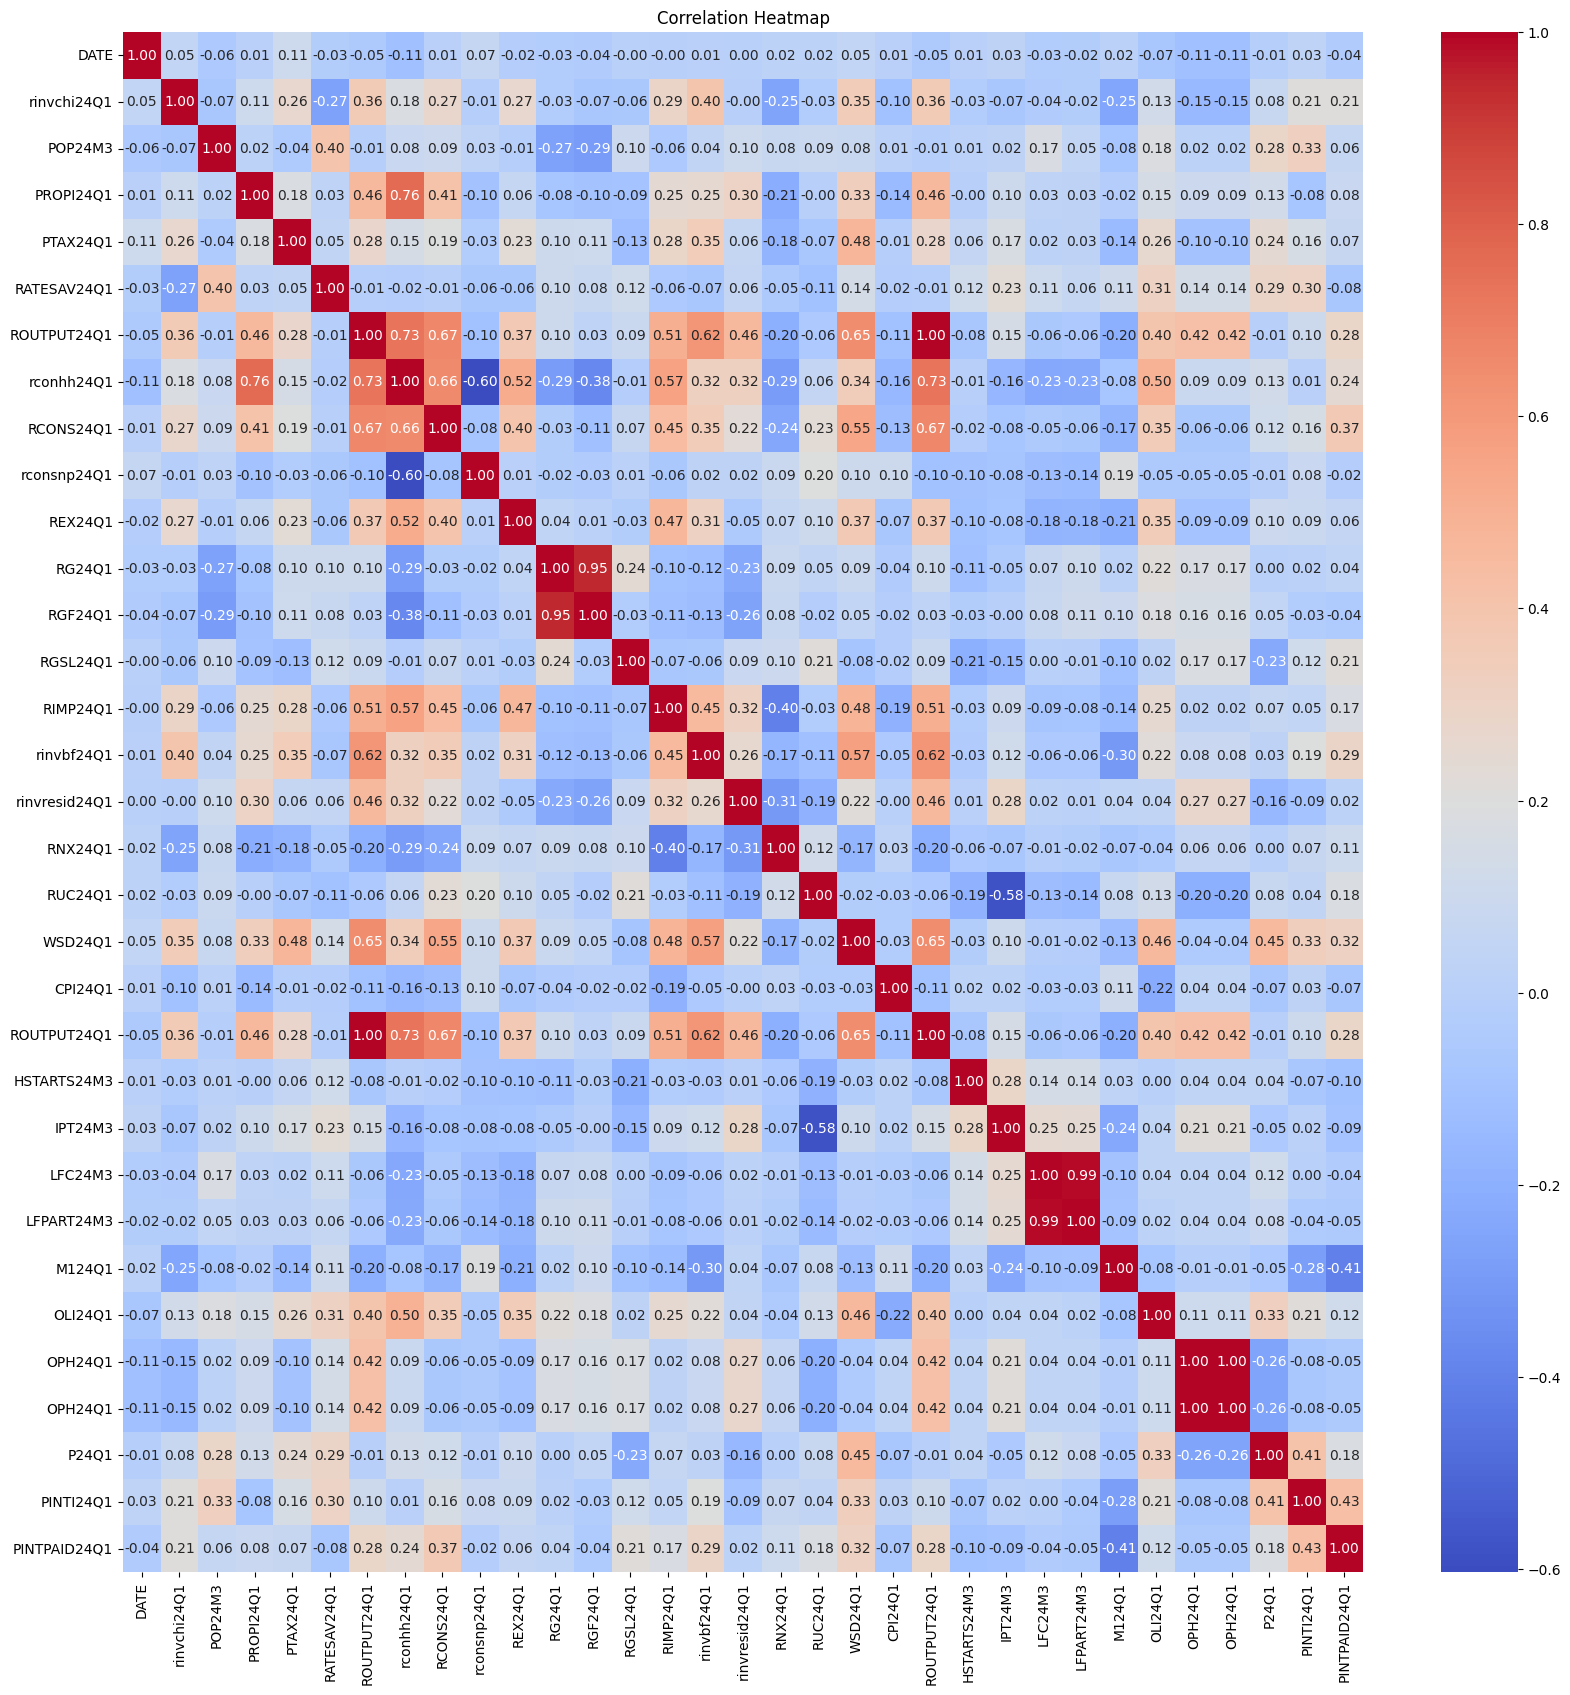

In [283]:
# FEATUREs
heatmap_num = apply_month(data_extract('24Q1')) #use most accurate values
plt.figure(figsize=(20, 20))
sns.heatmap(heatmap_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

use whole column as testnig dataset 

In [268]:
df = data_extract(lookup)
df

,DATE,ROUTPUT23Q1,rinvchi23Q1,POP23M3,PROPI23Q1,PTAX23Q1,RATESAV23Q1,ROUTPUT23Q1,rconhh23Q1,RCONS23Q1,...,IPT23M3,LFC23M3,LFPART23M3,M123Q1,OLI23Q1,OPH23Q1,OPH23Q1,P23Q1,PINTI23Q1,PINTPAID23Q1
1,1947:Q2,-0.270703,-4.5,NaN,-8.350172,1.550419,4.9941,-0.270703,NaN,1.443882,...,0.000000,NaN,NaN,NaN,-6.124363,0.430858,0.430858,1.353560,3.390155,0.000000
2,1947:Q3,-0.207213,-17.5,NaN,1.785762,1.020417,7.0787,-0.207213,NaN,-0.204997,...,0.722025,NaN,NaN,NaN,-7.654008,-1.004985,-1.004985,1.563107,2.197891,10.536052
3,1947:Q4,1.553458,-2.9,NaN,3.193305,5.433435,5.7810,1.553458,NaN,-0.527231,...,0.701757,NaN,NaN,NaN,-2.298952,1.308856,1.308856,2.041543,2.150621,0.000000
4,1948:Q1,1.491376,14.6,0.071057,3.922071,1.904819,6.9077,1.491376,NaN,1.064454,...,-1.398624,-0.752943,-0.4837,NaN,1.156082,2.299499,2.299499,1.139163,1.058211,18.232156
5,1948:Q2,1.639264,27.8,0.067018,9.929822,-11.483926,8.6528,1.639264,NaN,1.556895,...,1.369884,1.629091,0.9174,NaN,0.000000,2.003608,2.003608,1.180762,1.047130,8.004271
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2022:Q4,0.712500,129.9,0.051364,0.433724,0.435690,2.9209,0.712500,-0.099958,0.637443,...,-1.357926,0.266470,0.1339,-1.261955,1.058784,0.796719,0.796719,0.852324,2.404550,6.268158
304,2023:Q1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305,2023:Q2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306,2023:Q3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [324]:
df = data_extract(lookup)
X_no_lag = df.loc[:, ~df.columns.str.startswith('ROUTPUT')]
X_no_lag = X_no_lag.drop(columns=['DATE'])

y_no_lag = df.loc[:, df.columns.str.startswith('ROUTPUT')].iloc[:,0]


# Drop NA rows at the bottom of X_no_lag
X_no_lag = X_no_lag.dropna(how='all', axis=0)
# Drop NA rows at the bottom of y_no_lag
y_no_lag = y_no_lag.dropna(how='all')
X_no_lag

,rinvchi23Q1,POP23M3,PROPI23Q1,PTAX23Q1,RATESAV23Q1,rconhh23Q1,RCONS23Q1,rconsnp23Q1,REX23Q1,RG23Q1,...,IPT23M3,LFC23M3,LFPART23M3,M123Q1,OLI23Q1,OPH23Q1,OPH23Q1,P23Q1,PINTI23Q1,PINTPAID23Q1
0,6.5,NaN,NaN,NaN,7.3900,NaN,NaN,NaN,NaN,NaN,...,0.722025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-4.5,NaN,-8.350172,1.550419,4.9941,NaN,1.443882,NaN,-1.237129,-0.076365,...,0.000000,NaN,NaN,NaN,-6.124363,0.430858,0.430858,1.353560,3.390155,0.000000
2,-17.5,NaN,1.785762,1.020417,7.0787,NaN,-0.204997,NaN,-5.216723,-0.019100,...,0.722025,NaN,NaN,NaN,-7.654008,-1.004985,-1.004985,1.563107,2.197891,10.536052
3,-2.9,NaN,3.193305,5.433435,5.7810,NaN,-0.527231,NaN,-12.065601,-0.824786,...,0.701757,NaN,NaN,NaN,-2.298952,1.308856,1.308856,2.041543,2.150621,0.000000
4,14.6,0.071057,3.922071,1.904819,6.9077,NaN,1.064454,NaN,-4.669618,1.491138,...,-1.398624,-0.752943,-0.4837,NaN,1.156082,2.299499,2.299499,1.139163,1.058211,18.232156
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,197.6,0.040827,-0.161898,4.106554,7.2842,-0.001304,0.866233,1.400135,5.283777,-0.237054,...,-0.196271,0.058511,0.0110,0.740850,1.624624,1.089500,1.089500,1.652068,0.108656,0.602946
300,214.5,0.045561,1.199615,11.417724,4.3187,-0.486996,0.521501,1.236876,-1.174900,-0.573000,...,0.677969,0.267550,0.1383,0.184236,1.650074,-1.559086,-1.559086,1.993016,0.799211,3.713771
301,110.2,0.059145,1.316241,1.357773,3.2143,0.183240,1.115318,-0.253918,3.230125,-0.410460,...,-0.288323,-0.168149,-0.1415,-0.345279,0.976283,-0.974991,-0.974991,2.154406,2.237177,6.464499
302,38.7,0.065085,1.519400,1.268384,2.7249,0.126067,0.900680,-2.228736,3.405914,0.916046,...,0.095740,-0.057692,-0.0765,-0.927482,1.231200,0.284952,0.284952,1.067450,1.711824,13.149323


In [232]:
df1= series_to_supervised(gdp["ROUTPUT23Q1"]).iloc[:,0]

final_data =  pd.concat([df, df1], axis=1)
final_data = final_data[final_data.filter(like='ROUTPUT').notnull().all(axis=1)]
final_data.reset_index(drop=True, inplace=True)
final_data = apply_month(final_data)

In [236]:
test1 = data_extract("24Q1").iloc[1:,:]
test2= series_to_supervised(gdp["ROUTPUT24Q1"]).iloc[:,0]
test_data = apply_month(pd.concat([test1, test2], axis=1).iloc[len(final_data):,:].dropna())
new_column_names = final_data.columns
test_data.columns = new_column_names
test_data

,DATE,ROUTPUT23Q1,rinvchi23Q1,POP23M3,PROPI23Q1,PTAX23Q1,RATESAV23Q1,ROUTPUT23Q1,rconhh23Q1,RCONS23Q1,...,LFC23M3,LFPART23M3,M123Q1,OLI23Q1,OPH23Q1,OPH23Q1,P23Q1,PINTI23Q1,PINTPAID23Q1,var1(t-1)
304,202311,0.554621,27.2,0.060107,0.114983,-11.344369,4.7696,0.554621,0.670061,0.769034,...,0.256493,0.1228,-1.955059,1.761401,-0.141453,-0.141453,0.952037,2.179165,6.013344,0.633654
305,202341,0.510176,14.9,0.068614,-0.180748,-2.191217,5.0962,0.510176,-0.836671,0.241734,...,0.106044,0.0235,-0.376785,0.875397,0.834795,0.834795,0.432005,0.600156,12.290462,0.554621
306,202371,1.186611,77.8,0.080428,1.927470,1.930357,4.1915,1.186611,0.551487,0.553186,...,0.033955,-0.0292,-0.722686,1.178537,1.182534,1.182534,0.820183,1.223395,11.132542,0.510176
307,2023101,0.806849,82.7,0.063082,1.446786,0.474115,3.9909,0.806849,-0.045540,0.580727,...,-0.402888,-0.2918,0.307077,1.063883,0.816404,0.816404,0.367426,2.177207,6.069114,1.186611


In [237]:
final_data

,DATE,ROUTPUT23Q1,rinvchi23Q1,POP23M3,PROPI23Q1,PTAX23Q1,RATESAV23Q1,ROUTPUT23Q1,rconhh23Q1,RCONS23Q1,...,LFC23M3,LFPART23M3,M123Q1,OLI23Q1,OPH23Q1,OPH23Q1,P23Q1,PINTI23Q1,PINTPAID23Q1,var1(t-1)
0,194741,-0.270703,-4.5,NaN,-8.350172,1.550419,4.9941,-0.270703,NaN,1.443882,...,NaN,NaN,NaN,-6.124363,0.430858,0.430858,1.353560,3.390155,0.000000,NaN
1,194771,-0.207213,-17.5,NaN,1.785762,1.020417,7.0787,-0.207213,NaN,-0.204997,...,NaN,NaN,NaN,-7.654008,-1.004985,-1.004985,1.563107,2.197891,10.536052,-0.270703
2,1947101,1.553458,-2.9,NaN,3.193305,5.433435,5.7810,1.553458,NaN,-0.527231,...,NaN,NaN,NaN,-2.298952,1.308856,1.308856,2.041543,2.150621,0.000000,-0.207213
3,194811,1.491376,14.6,0.071057,3.922071,1.904819,6.9077,1.491376,NaN,1.064454,...,-0.752943,-0.4837,NaN,1.156082,2.299499,2.299499,1.139163,1.058211,18.232156,1.553458
4,194841,1.639264,27.8,0.067018,9.929822,-11.483926,8.6528,1.639264,NaN,1.556895,...,1.629091,0.9174,NaN,0.000000,2.003608,2.003608,1.180762,1.047130,8.004271,1.491376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,2021101,1.681542,197.6,0.040827,-0.161898,4.106554,7.2842,1.681542,-0.001304,0.866233,...,0.058511,0.0110,0.740850,1.624624,1.089500,1.089500,1.652068,0.108656,0.602946,0.654824
299,202211,-0.411217,214.5,0.045561,1.199615,11.417724,4.3187,-0.411217,-0.486996,0.521501,...,0.267550,0.1383,0.184236,1.650074,-1.559086,-1.559086,1.993016,0.799211,3.713771,1.681542
300,202241,-0.144653,110.2,0.059145,1.316241,1.357773,3.2143,-0.144653,0.183240,1.115318,...,-0.168149,-0.1415,-0.345279,0.976283,-0.974991,-0.974991,2.154406,2.237177,6.464499,-0.411217
301,202271,0.798002,38.7,0.065085,1.519400,1.268384,2.7249,0.798002,0.126067,0.900680,...,-0.057692,-0.0765,-0.927482,1.231200,0.284952,0.284952,1.067450,1.711824,13.149323,-0.144653


In [242]:

train_percentage = 0.8
n_tree = 100

# Split the data into training and testing sets
train_data = final_data 
test_data =  test_data

# Define the features and target variable
# Filter columns for X_train
X_train = train_data.drop(columns=[col for col in train_data.columns if col.startswith('ROUTPUT')])
  
# Filter columns for y_train
y_train = train_data[[col for col in train_data.columns if col.startswith('ROUTPUT')]].iloc[:,0]

# Filter columns for X_test
X_test = test_data.drop(columns=[col for col in test_data.columns if col.startswith('ROUTPUT')] )

# Filter columns for y_test
y_test = test_data[[col for col in test_data.columns if col.startswith('ROUTPUT')]].iloc[:,0]


# Fit a Random Forest model
rf_model = RandomForestRegressor(n_estimators= n_tree)
rf_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = rf_model.predict(X_test)

# Evaluate the model using RMSE
rmse = sqrt(mean_squared_error(y_test, predictions))
print("RMSE:", rmse)

RMSE: 0.2074319586717196


In [244]:
predictions

array([0.44199519, 0.80453542, 1.07244131, 0.56241986])

In [248]:
y_test

304    0.554621
305    0.510176
306    1.186611
307    0.806849
Name: ROUTPUT23Q1, dtype: float64

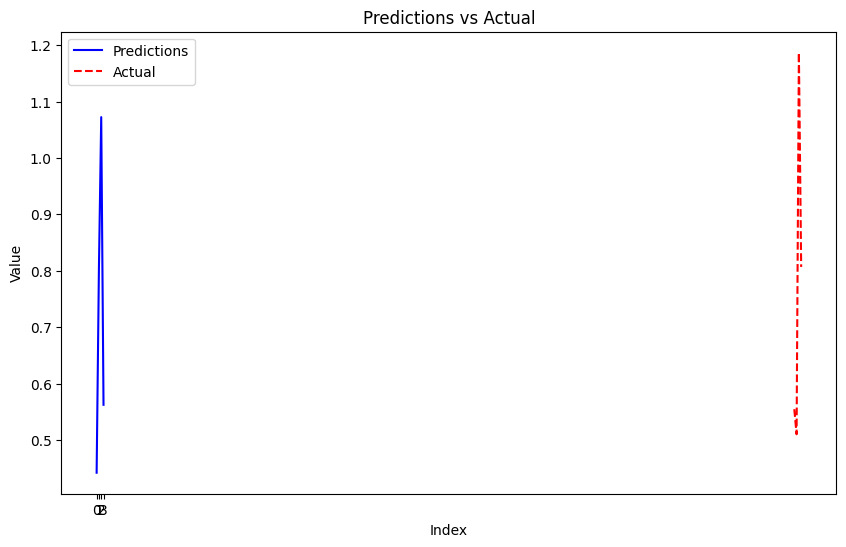

In [250]:
# Get feature importances
importances = rf_model.feature_importances_

# Get feature names
feature_names = X_train.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()
